# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Test requests command and outline for api
response = requests.get("http://api.openweathermap.org/data/2.5/weather?q="+cities[27]+"&appid=" + weather_api_key).json()
pprint(response)

1.93


In [25]:

# Initialize arrays for results
name = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

# Run though all cities and export results to arrays
# Try&Except to remove cities without results
for city in range(len(cities)):
    try:
        response = requests.get("http://api.openweathermap.org/data/2.5/weather?q="+cities[city]+"&appid=" + weather_api_key +"&units=imperial").json()
        city_name = response["name"]
        latitude = response["coord"]["lat"]
        longitude = response["coord"]["lon"]
        temp = response["main"]["temp_max"]
        hum = response["main"]["humidity"]
        cloud = response["clouds"]["all"]
        count = response["sys"]["country"]
        speed = response["wind"]["speed"]
        dt = response["dt"]
        
        name.append(city_name)
        Lat.append(latitude)
        Lng.append(longitude)
        Max_Temp.append(temp)
        Humidity.append(hum)
        Cloudiness.append(cloud)
        Country.append(count)
        Wind_Speed.append(speed)
        Date.append(dt)
        print("Testing city number " + str(city) + ". " + cities[city] + " found.")
    except:
        print("could not find " +cities[city]+ ".")

        


Testing city number 0. tiznit found.
Testing city number 1. guerrero negro found.
could not find zhitikara.
could not find taolanaro.
Testing city number 4. dikson found.
Testing city number 5. yellowknife found.
Testing city number 6. ushuaia found.
Testing city number 7. gamba found.
Testing city number 8. sitka found.
Testing city number 9. adrar found.
Testing city number 10. libertador general san martin found.
Testing city number 11. igrim found.
Testing city number 12. torbay found.
Testing city number 13. kapaa found.
Testing city number 14. punta arenas found.
Testing city number 15. longyearbyen found.
Testing city number 16. grand gaube found.
Testing city number 17. kruisfontein found.
Testing city number 18. promissao found.
Testing city number 19. novoaleksandrovsk found.
Testing city number 20. ribeira grande found.
Testing city number 21. bredasdorp found.
Testing city number 22. tiksi found.
Testing city number 23. carnarvon found.
Testing city number 24. georgetown fo

could not find tabiauea.
Testing city number 208. mackay found.
Testing city number 209. emerald found.
Testing city number 210. road town found.
Testing city number 211. karratha found.
Testing city number 212. sergeyevka found.
Testing city number 213. caravelas found.
Testing city number 214. greenville found.
could not find warqla.
Testing city number 216. tynset found.
Testing city number 217. aztec found.
Testing city number 218. tabas found.
Testing city number 219. taoudenni found.
Testing city number 220. bontang found.
Testing city number 221. ilulissat found.
Testing city number 222. jalingo found.
Testing city number 223. banff found.
Testing city number 224. watsa found.
Testing city number 225. viedma found.
Testing city number 226. grindavik found.
Testing city number 227. pampa found.
Testing city number 228. norman wells found.
Testing city number 229. chabahar found.
Testing city number 230. maragogi found.
Testing city number 231. biak found.
Testing city number 232.

Testing city number 413. porto novo found.
Testing city number 414. teguldet found.
Testing city number 415. palmer found.
could not find utiroa.
Testing city number 417. iquique found.
Testing city number 418. soyo found.
Testing city number 419. husavik found.
Testing city number 420. kirakira found.
Testing city number 421. verkhnevilyuysk found.
Testing city number 422. lhokseumawe found.
could not find malwan.
Testing city number 424. victoria point found.
Testing city number 425. srednekolymsk found.
Testing city number 426. saint anthony found.
Testing city number 427. manta found.
Testing city number 428. tibagi found.
Testing city number 429. khash found.
Testing city number 430. baracoa found.
Testing city number 431. fare found.
Testing city number 432. komsomolskiy found.
Testing city number 433. paamiut found.
Testing city number 434. veraval found.
Testing city number 435. antalaha found.
Testing city number 436. santa ana found.
Testing city number 437. timra found.
Test

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
# Checking if all arrays have same length
print(len(name)) 
print(len(Lat)) 
print(len(Lng)) 
print(len(Max_Temp)) 
print(len(Humidity)) 
print(len(Cloudiness)) 
print(len(Wind_Speed)) 
print(len(Country)) 
print(len(Date))


547
547
547
547
547
547
547
547
547


In [27]:
# Combine arrays to form a result data frame
data = pd.DataFrame({"City": name,
                     "Lat": Lat,
                     "Lng": Lng,
                     "Max_Temp": Max_Temp,
                     "Humidity": Humidity,
                     "Cloudiness": Cloudiness,
                     "Wind_Speed": Wind_Speed,
                     "Country": Country,
                     "Date": Date})
data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Tiznit Province,29.58,-9.50,63.73,84,67,0.87,MA,1603258404
1,Guerrero Negro,27.98,-114.06,68.34,90,0,9.24,MX,1603258404
2,Dikson,73.51,80.55,24.91,97,95,5.41,RU,1603258405
3,Yellowknife,62.46,-114.35,23.00,73,90,9.17,CA,1603258290
4,Ushuaia,-54.80,-68.30,39.20,86,40,8.34,AR,1603258405


In [28]:
# Export to CSV
data.to_csv("../output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:
# Checking for values over 100
data["Humidity"].unique()

array([ 84,  90,  97,  73,  86,  88,  20,  65,  95,  87,  74,  68,  60,
        64,  93,  92,  62,  91, 100,  78,  98,  80,  81,  69,  96,  75,
        17,  85,  22,  76,  44,  45,  58,  70,  46,  82,  94,  79,  83,
        52,  13,  67,  55,  71,  56,  50,  14,  49,  77,  63,   9,  41,
        66,  47,  21,  48,  16,  15,  89,  11,  26,  72,  54,  33,  32,
        23,  59,  34,  29,  61,  99,  36,  57,  18,  27,  51,  28,  37,
         8,  53,  30,  40,  31], dtype=int64)

No humidity value over 100; therefore, we skip this step.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

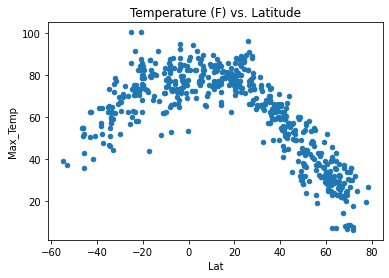

In [32]:
data.plot.scatter(x = "Lat", y = "Max_Temp")
plt.title("Temperature (F) vs. Latitude")
plt.savefig("../output_data/Fig1.png")

This plot is comparing the latitude of the city and its max temperature. One can see that as the latitude approaches 0 degress, or the equator, the temperature reaches a peak.

## Latitude vs. Humidity Plot

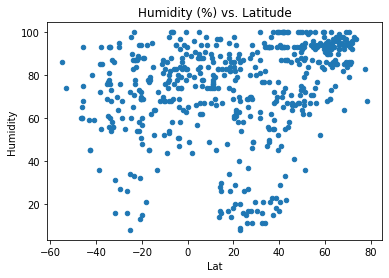

In [33]:
data.plot.scatter(x = "Lat", y = "Humidity")
plt.title("Humidity (%) vs. Latitude")
plt.savefig("../output_data/Fig2.png")

This plot is comparing the latitude of the city and its humidity. One can see that the higher the latitude, the tighter the distribution of humidity for cities. Likewise the further north the city is located the more humid likely it is to be humid.

## Latitude vs. Cloudiness Plot

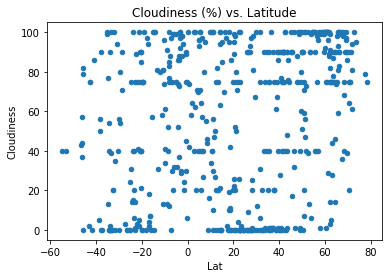

In [34]:
data.plot.scatter(x = "Lat", y = "Cloudiness")
plt.title("Cloudiness (%) vs. Latitude")
plt.savefig("../output_data/Fig3.png")

This plot is comparing the latitude of the city and its percentage of cloud cover. Like the previous plot for humidity as the latitude increases so to does the amount of clouds in the sky.

## Latitude vs. Wind Speed Plot

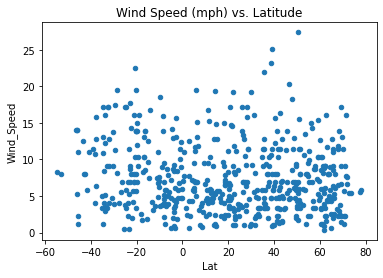

In [35]:
data.plot.scatter(x = "Lat", y = "Wind_Speed")
plt.title("Wind Speed (mph) vs. Latitude")
plt.savefig("../output_data/Fig4.png")

This plot is comparing the latitude of the city and its average wind speed. One can see that the wind speed seems to sit mostly below 10mph, and as the latitude increases the more conjested the distribution.

## Linear Regression

In [36]:
# Make new data frames for northern and southern hemisphere
North_data = data[data["Lat"] >= 0]
North_data.head()
South_data = data[data["Lat"] < 0]
South_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
4,Ushuaia,-54.80,-68.30,39.20,86,40,8.34,AR,1603258405
5,Gamba,-2.65,10.00,76.59,88,98,4.12,GA,1603258405
8,Libertador General San Martín,-23.81,-64.79,73.00,65,100,4.00,AR,1603258406
12,Punta Arenas,-53.15,-70.92,37.40,74,40,8.05,CL,1603258294
14,Grand Gaube,-20.01,57.66,80.01,60,0,11.99,MU,1603258407


In [37]:
# Created linear regression function to be called upon
def linear_regression(x, y, x_label, y_label, title):
    plt.scatter(x, y)
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    plt.plot(x, slope*x + intercept, "r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

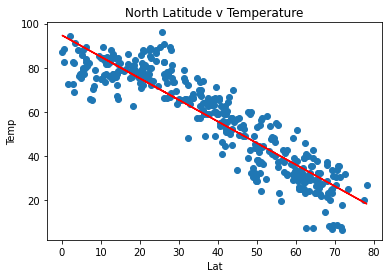

In [38]:

linear_regression(North_data["Lat"], North_data["Max_Temp"], "Lat", "Temp", "North Latitude v Temperature")

In the northern hemisphere the linear regression shows that as latitude increases temperature decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

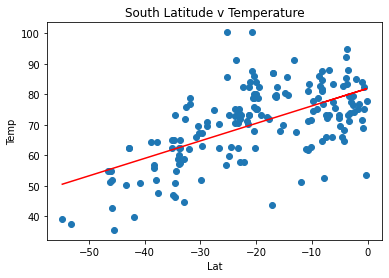

In [39]:
linear_regression(South_data["Lat"], South_data["Max_Temp"], "Lat", "Temp", "South Latitude v Temperature")

Meanwhile in the southern hemisphere the linear regressions shows that as latitude decreases so to does temperature.

####  Max Temp vs. Latitude Analysis

Looking at both hemispheres it can be deduced that the temperature reaches a maximum the closer one is to the equator or 0 degress of latitude

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

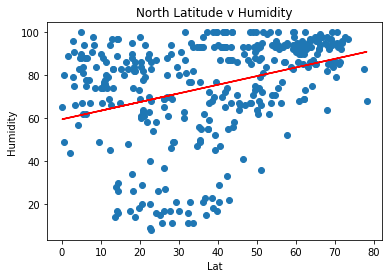

In [40]:
linear_regression(North_data["Lat"], North_data["Humidity"], "Lat", "Humidity", "North Latitude v Humidity")

In the northern hemisphere the linear regression shows that as latitude increases humidity also increases.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

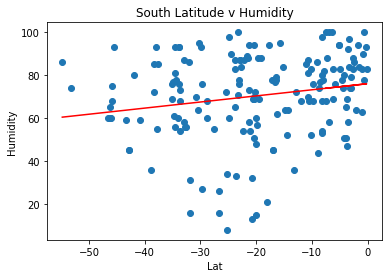

In [41]:
linear_regression(South_data["Lat"], South_data["Humidity"], "Lat", "Humidity", "South Latitude v Humidity")

Meanwhile this trend continues in the southern hemisphere.

####  Humidity vs. Latitude Analysis

This would lead one to believe that as one travels north(increasing latitude) the humidity will also increase. A point of notice could be the time of year though, in the summer the earth is tilted towards the sun which could be a cause for increase in humidity. It would be interesting to see data from the winter and see if the trend is the same.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

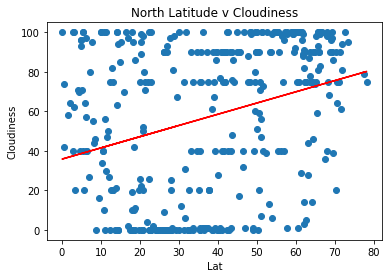

In [42]:
linear_regression(North_data["Lat"], North_data["Cloudiness"], "Lat", "Cloudiness", "North Latitude v Cloudiness")

In the northern hemisphere the linear regression for cloudiness shows an increase in cloudiness as one increases their latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

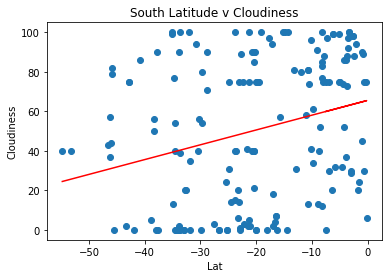

In [43]:
linear_regression(South_data["Lat"], South_data["Cloudiness"], "Lat", "Cloudiness", "South Latitude v Cloudiness")

Meanwhile the trend continues for the southern hemisphere; although, the distribution of data points seems to be more spread out.

####  Cloudiness vs. Latitude Analysis

As one travels north the trend shows an increase in cloudiness as well as a conjestion of the distribution of data points. This later observation could be due to the fact that the locations of cities was chosen at random, but it is a point of emphasis in this analysis.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

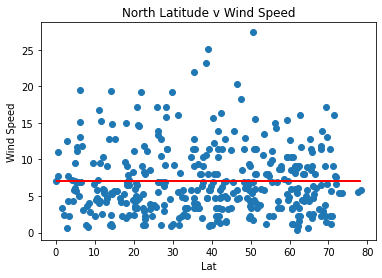

In [44]:
linear_regression(North_data["Lat"], North_data["Wind_Speed"], "Lat", "Wind Speed", "North Latitude v Wind Speed")

The linear regression of latitude vs windspeed for the northern hemisphere does not show any coorelation, meaning there is little to prove any conclusion.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

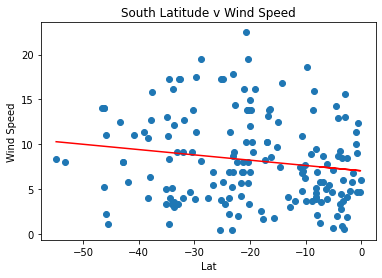

In [45]:
linear_regression(South_data["Lat"], South_data["Wind_Speed"], "Lat", "Wind Speed", "South Latitude v Wind Speed")

Meanwhile the southern hemisphere tends to show a slight inverse correlation between wind speed and latitude traveling from an average of 10 to 6 mph as one approaches the equator.

####  Wind Speed vs Latitude Analysis

The data provided tends to show that there is no correlation between wind speed and latitude. Althought there is a slight change in the southern hemisphere, when looked along side the north the data does not draw any repeatable conclusion.